In [281]:
import pandas as pd
import numpy as np

In [282]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [283]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [284]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [285]:
data.shape

(7613, 5)

In [286]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [287]:
data=data.iloc[:,[0,3,4]]
test_data=test_data.iloc[:,[0,3]]

In [288]:
test_data

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [289]:
data.isna().sum()

id        0
text      0
target    0
dtype: int64

In [290]:
import regex as re

In [291]:
data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [292]:
def remove_pattern(text,pattern):
    x=re.findall(pattern,text)
    for i in x:
        text=re.sub(i,'',text)
    return text

In [293]:
from nltk.tokenize import word_tokenize

In [294]:
data['tokenized']=[word_tokenize(x) for x in data['text'] ]
test_data['tokenized']=[word_tokenize(x) for x in test_data['text'] ]
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,4,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #, ..."


In [295]:
from nltk.stem import WordNetLemmatizer

In [296]:
lem=WordNetLemmatizer()

In [297]:
data['tokenized']=data['tokenized'].apply(lambda x: [lem.lemmatize(i) for i in x])
test_data['tokenized']=test_data['tokenized'].apply(lambda x: [lem.lemmatize(i) for i in x])
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,4,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,"[All, resident, asked, to, 'shelter, in, place..."
3,6,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfire, evacuat..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #, ..."


In [298]:
from string import punctuation
from nltk.corpus import stopwords

In [299]:
num=[1,2,3,4,5,6,7,8,9,0]
stops=list(stopwords.words('english'))+list(punctuation)+list(num)
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [300]:
data['tokenized']= data['tokenized'].apply(lambda x:[i for i in x if i not in stops])
test_data['tokenized']= test_data['tokenized'].apply(lambda x:[i for i in x if i not in stops])
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, Reason, earthquake, May, ALLAH, F..."
1,4,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,"[All, resident, asked, 'shelter, place, notifi..."
3,6,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfire, evacuation..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, photo, Ruby, Alaska, smoke, ..."


In [301]:
data['tokenized']=data['tokenized'].apply(lambda x: ' '.join(x))
test_data['tokenized']=test_data['tokenized'].apply(lambda x: ' '.join(x))

In [302]:
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds Reason earthquake May ALLAH Forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,All resident asked 'shelter place notified off...
3,6,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfire evacuation orde..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent photo Ruby Alaska smoke wildfire...


In [303]:
all_word=' '.join(data['tokenized'])

In [304]:
all_word

"Our Deeds Reason earthquake May ALLAH Forgive u Forest fire near La Ronge Sask Canada All resident asked 'shelter place notified officer No evacuation shelter place order expected 13,000 people receive wildfire evacuation order California Just got sent photo Ruby Alaska smoke wildfire pours school RockyFire Update California Hwy 20 closed direction due Lake County fire CAfire wildfire flood disaster Heavy rain cause flash flooding street Manitou Colorado Springs area I 'm top hill I see fire wood ... There 's emergency evacuation happening building across street I 'm afraid tornado coming area ... Three people died heat wave far Haha South Tampa getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GON NA DO WHAT AM I GON NA DO FVCK flooding raining flooding Florida TampaBay Tampa 18 19 day I 've lost count Flood Bago Myanmar We arrived Bago Damage school bus 80 multi car crash BREAKING What 's man I love fruit Summer lovely My car fast What goooooooaaaaaal ridiculous ...

In [305]:
data['tokenized']=data['tokenized'].apply(lambda x: remove_pattern(x,'http[\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x: remove_pattern(x,'http[\w]*'))

In [306]:
data['tokenized']=data['tokenized'].apply(lambda x: remove_pattern(x,'//t.co/[\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x: remove_pattern(x,'//t.co/[\w]*'))

In [307]:
all_word1=' '.join(data['tokenized'])
all_word1

"Our Deeds Reason earthquake May ALLAH Forgive u Forest fire near La Ronge Sask Canada All resident asked 'shelter place notified officer No evacuation shelter place order expected 13,000 people receive wildfire evacuation order California Just got sent photo Ruby Alaska smoke wildfire pours school RockyFire Update California Hwy 20 closed direction due Lake County fire CAfire wildfire flood disaster Heavy rain cause flash flooding street Manitou Colorado Springs area I 'm top hill I see fire wood ... There 's emergency evacuation happening building across street I 'm afraid tornado coming area ... Three people died heat wave far Haha South Tampa getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GON NA DO WHAT AM I GON NA DO FVCK flooding raining flooding Florida TampaBay Tampa 18 19 day I 've lost count Flood Bago Myanmar We arrived Bago Damage school bus 80 multi car crash BREAKING What 's man I love fruit Summer lovely My car fast What goooooooaaaaaal ridiculous ...

In [308]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'\x89[\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'\x89Û[\w]*'))

In [309]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'[0-9][\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'[0-9][\w]*'))

In [310]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'[.,/:-][\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'[0-9][\w]*'))

In [311]:
all_word2=' '.join(data['tokenized'])
all_word2

"Our Deeds Reason earthquake May ALLAH Forgive u Forest fire near La Ronge Sask Canada All resident asked 'shelter place notified officer No evacuation shelter place order expected  people receive wildfire evacuation order California Just got sent photo Ruby Alaska smoke wildfire pours school RockyFire Update California Hwy  closed direction due Lake County fire CAfire wildfire flood disaster Heavy rain cause flash flooding street Manitou Colorado Springs area  There 's emergency evacuation happening building across street  Three people died heat wave far Haha South Tampa getting flooded hah WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GON NA DO WHAT AM I GON NA DO FVCK flooding raining flooding Florida TampaBay Tampa   day I 've lost count Flood Bago Myanmar We arrived Bago Damage school bus  multi car crash BREAKING What 's man I love fruit Summer lovely My car fast What goooooooaaaaaal  London cool Love skiing What wonderful day LOOOOOOL  Was NYC last week Love girlfriend Cooool Do

In [312]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'[ª¢][\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'[ª¢][\w]*'))

In [313]:
all_word3=' '.join(data['tokenized'])
all_word3

"Our Deeds Reason earthquake May ALLAH Forgive u Forest fire near La Ronge Sask Canada All resident asked 'shelter place notified officer No evacuation shelter place order expected  people receive wildfire evacuation order California Just got sent photo Ruby Alaska smoke wildfire pours school RockyFire Update California Hwy  closed direction due Lake County fire CAfire wildfire flood disaster Heavy rain cause flash flooding street Manitou Colorado Springs area  There 's emergency evacuation happening building across street  Three people died heat wave far Haha South Tampa getting flooded hah WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GON NA DO WHAT AM I GON NA DO FVCK flooding raining flooding Florida TampaBay Tampa   day I 've lost count Flood Bago Myanmar We arrived Bago Damage school bus  multi car crash BREAKING What 's man I love fruit Summer lovely My car fast What goooooooaaaaaal  London cool Love skiing What wonderful day LOOOOOOL  Was NYC last week Love girlfriend Cooool Do

In [314]:
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds Reason earthquake May ALLAH Forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,All resident asked 'shelter place notified off...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order Cali...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent photo Ruby Alaska smoke wildfire...


In [315]:
data1=data.drop('text',axis=1)
test_data=test_data.drop('text',axis=1)

In [316]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [317]:
wordcloud=WordCloud(width=400,height=300,random_state=42,max_font_size=100).generate(all_word3)

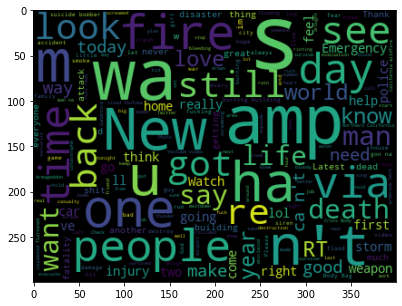

In [318]:
plt.figure(figsize=(20,5))
plt.imshow(wordcloud,interpolation='bilinear')

In [319]:
neg=''.join([x for x in data1['tokenized'][data1['target']==1]])

In [320]:
neg

"Our Deeds Reason earthquake May ALLAH Forgive uForest fire near La Ronge Sask CanadaAll resident asked 'shelter place notified officer No evacuation shelter place order expected people receive wildfire evacuation order CaliforniaJust got sent photo Ruby Alaska smoke wildfire pours schoolRockyFire Update California Hwy  closed direction due Lake County fire CAfire wildfireflood disaster Heavy rain cause flash flooding street Manitou Colorado Springs areaThere 's emergency evacuation happening building across streetThree people died heat wave farHaha South Tampa getting flooded hah WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GON NA DO WHAT AM I GON NA DO FVCK floodingraining flooding Florida TampaBay Tampa   day I 've lost countFlood Bago Myanmar We arrived BagoDamage school bus  multi car crash BREAKINGbbcmtd Wholesale Markets ablaze  AFRICANBAZE Breaking news Nigeria flag set ablaze Aba  INEC Office Abia Set Ablaze  How West wa burned Thousands wildfire ablaze California alone  Depu

In [321]:
negword=WordCloud(width=400,height=300,random_state=42,max_font_size=100).generate(neg)

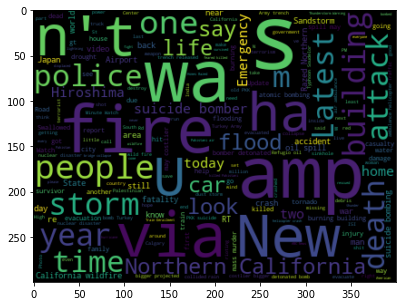

In [322]:
plt.figure(figsize=(20,5))
plt.imshow(negword,interpolation='bilinear')

In [323]:
pos=''.join([x for x in data1['tokenized'][data1['target']==0]])

In [324]:
pos=WordCloud(width=400,height=300,random_state=42,max_font_size=100).generate(pos)

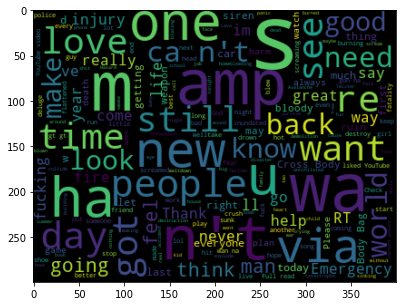

In [325]:
plt.figure(figsize=(20,5))
plt.imshow(pos,interpolation='bilinear')

## CountVector

In [326]:
from sklearn.feature_extraction.text import CountVectorizer

In [327]:
cv=CountVectorizer()

In [717]:
v1=cv.fit_transform(data1['tokenized'])
test_v1=cv.transform(test_data['tokenized'])

## LogisticRegression

In [329]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [330]:
sm=SMOTE()

In [719]:
x=v1
y=data1['target']
x_val=test_v1

In [720]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [333]:
y_train.value_counts()

0    2896
1    2204
Name: target, dtype: int64

In [721]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [722]:
y_train.value_counts()

0    2896
1    2896
Name: target, dtype: int64

In [336]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)

In [337]:
model.score(x_train,y_train)

0.9124654696132597

In [338]:
model.score(x_test,y_test)

0.7166732988460008

In [339]:
y_pred=model.predict(x_test)

In [340]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1164
           1       0.80      0.63      0.71      1349

    accuracy                           0.72      2513
   macro avg       0.73      0.72      0.72      2513
weighted avg       0.73      0.72      0.72      2513



In [341]:
confusion_matrix(y_pred,y_test)

array([[949, 215],
       [497, 852]], dtype=int64)

#### 72

## RidgeClassifier

In [705]:
from sklearn.linear_model import RidgeClassifier

In [792]:
rc=RidgeClassifier(alpha=19)
modelr=rc.fit(x_train,y_train)
modelr.score(x_train,y_train)

0.8737914364640884

In [793]:
modelr.score(x_test,y_test)

0.7154795065658576

In [794]:
y_pred=modelr.predict(x_test)

In [795]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72      1153
           1       0.80      0.63      0.71      1360

    accuracy                           0.72      2513
   macro avg       0.73      0.72      0.72      2513
weighted avg       0.73      0.72      0.71      2513



#### 72

## DecisionTree

In [342]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [343]:
dt=DecisionTreeClassifier(max_depth=98)
# para={'max_depth':range(1,100)}
# gv=GridSearchCV(dt,param_grid=para,cv=5)
model1=dt.fit(x_train,y_train)

In [344]:
model1.score(x_train,y_train)

0.7886740331491713

In [345]:
model1.score(x_test,y_test)

0.6199761241543972

In [346]:
y_pred=model1.predict(x_test)

In [347]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.79      0.59       861
           1       0.83      0.53      0.65      1652

    accuracy                           0.62      2513
   macro avg       0.65      0.66      0.62      2513
weighted avg       0.70      0.62      0.63      2513



In [348]:
confusion_matrix(y_pred,y_test)

array([[676, 185],
       [770, 882]], dtype=int64)

#### 62

## RandomForest

In [349]:
from sklearn.ensemble import RandomForestClassifier

In [350]:
rf=RandomForestClassifier(n_estimators=150,bootstrap=True)
# para={'n_estimators':range(50,200)}
# gv=GridSearchCV(rf,param_grid=para,cv=5)
model2=rf.fit(x_train,y_train)
model2.score(x_train,y_train)

0.9307665745856354

In [351]:
model2.score(x_test,y_test)

0.7063270990847592

In [352]:
y_pred=model2.predict(x_test)

In [353]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1276
           1       0.73      0.63      0.68      1237

    accuracy                           0.71      2513
   macro avg       0.71      0.71      0.70      2513
weighted avg       0.71      0.71      0.70      2513



In [354]:
confusion_matrix(y_pred,y_test)

array([[992, 284],
       [454, 783]], dtype=int64)

####  70

In [355]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

## KNN

In [356]:
from sklearn.neighbors import KNeighborsClassifier

In [357]:
kn=KNeighborsClassifier()
para={'n_neighbors':range(1,10)}
gv=GridSearchCV(kn,param_grid=para,cv=10)
model3=gv.fit(x_train,y_train)

In [358]:
model3.best_score_

0.588386933476267

In [359]:
model3.best_params_

{'n_neighbors': 1}

In [360]:
model3.score(x_train,y_train)

0.8026588397790055

In [361]:
model3.score(x_test,y_test)

0.645841623557501

In [362]:
y_pred=model3.predict(x_test)

In [363]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73      1906
           1       0.37      0.65      0.47       607

    accuracy                           0.65      2513
   macro avg       0.61      0.65      0.60      2513
weighted avg       0.73      0.65      0.67      2513



#### 64

## NaiveBayes

In [364]:
from sklearn.naive_bayes import MultinomialNB

In [365]:
nb=MultinomialNB(alpha=2.8)
model4=nb.fit(x_train,y_train)

In [366]:
model4.score(x_train,y_train)

0.7334254143646409

In [367]:
model4.score(x_test,y_test)

0.7278153601273378

In [368]:
y_pred=model4.predict(x_test)

In [369]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1706
           1       0.56      0.74      0.64       807

    accuracy                           0.73      2513
   macro avg       0.71      0.73      0.71      2513
weighted avg       0.76      0.73      0.74      2513



In [370]:
confusion_matrix(y_pred,y_test)

array([[1234,  472],
       [ 212,  595]], dtype=int64)

In [371]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 73

## SVM

In [372]:
from sklearn.svm import SVC

In [373]:
svm=SVC(C=2.3,kernel='rbf',random_state=42)
model5=svm.fit(x_train,y_train)

In [374]:
model5.score(x_train,y_train)

0.9242058011049724

In [375]:
model5.score(x_test,y_test)

0.6995622761639475

In [376]:
y_pred=model5.predict(x_test)

In [377]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1365
           1       0.68      0.64      0.66      1148

    accuracy                           0.70      2513
   macro avg       0.70      0.69      0.70      2513
weighted avg       0.70      0.70      0.70      2513



In [378]:
from sklearn.metrics import confusion_matrix

In [379]:
confusion_matrix(y_pred,y_test)

array([[1028,  337],
       [ 418,  730]], dtype=int64)

In [380]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 70

In [381]:
from sklearn.ensemble import AdaBoostClassifier

In [382]:
adc=AdaBoostClassifier(base_estimator=dt,n_estimators=100,learning_rate=0.8)
model6=adc.fit(x_train,y_train)

In [383]:
model6.score(x_train,y_train)

0.9307665745856354

In [384]:
model6.score(x_test,y_test)

0.6832471150019896

In [385]:
y_pred=model6.predict(x_test)

In [386]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1258
           1       0.72      0.61      0.66      1255

    accuracy                           0.68      2513
   macro avg       0.69      0.68      0.68      2513
weighted avg       0.69      0.68      0.68      2513



#### 68

#### using CountVectorizer so after checking all models accuracy and precision and recall i decided to use LogisticRegression model as final model 

# using TF-IDF

In [399]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [822]:
tf=TfidfVectorizer()
v2=tf.fit_transform(data1['tokenized'])
test_v2=tf.transform(test_data['tokenized'])

In [823]:
x=v2
y=data1['target']
x_val=test_v2

In [824]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [825]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [826]:
y_train.value_counts()

0    2896
1    2896
Name: target, dtype: int64

## LogisticRegression

In [420]:
lr=LogisticRegression(C=2)
tf_model=lr.fit(x_train,y_train)

In [421]:
tf_model.score(x_train,y_train)

0.8964088397790055

In [422]:
tf_model.score(x_test,y_test)

0.7321925984878631

In [423]:
y_pred=tf_model.predict(x_test)

In [424]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1169
           1       0.81      0.65      0.72      1344

    accuracy                           0.73      2513
   macro avg       0.74      0.74      0.73      2513
weighted avg       0.75      0.73      0.73      2513



#### 73

In [796]:
from sklearn.linear_model import RidgeClassifier

In [817]:
rc=RidgeClassifier(alpha=3)
modelr2=rc.fit(x_train,y_train)
modelr2.score(x_train,y_train)

0.8867403314917127

In [818]:
modelr2.score(x_test,y_test)

0.7309988062077198

In [819]:
y_pred=modelr2.predict(x_test)

In [820]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.83      0.74      1184
           1       0.81      0.65      0.72      1329

    accuracy                           0.73      2513
   macro avg       0.74      0.74      0.73      2513
weighted avg       0.74      0.73      0.73      2513



In [821]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 73

## DecisionTree

In [476]:
dt=DecisionTreeClassifier(max_depth=50,criterion='entropy')
tf_model1=dt.fit(x_train,y_train)

In [477]:
tf_model1.score(x_train,y_train)

0.6714433701657458

In [478]:
tf_model1.score(x_test,y_test)

0.6681257461201751

In [479]:
y_pred=tf_model1.predict(x_test)

In [480]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77      2130
           1       0.29      0.80      0.42       383

    accuracy                           0.67      2513
   macro avg       0.62      0.72      0.60      2513
weighted avg       0.85      0.67      0.71      2513



#### 67

## RandomForest

In [493]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
tf_model2=rf.fit(x_train,y_train)
tf_model2.score(x_train,y_train)

0.9311118784530387

In [494]:
tf_model2.score(x_test,y_test)

0.7206526064464783

In [495]:
y_pred=tf_model2.predict(x_test)

In [496]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1246
           1       0.76      0.64      0.70      1267

    accuracy                           0.72      2513
   macro avg       0.73      0.72      0.72      2513
weighted avg       0.73      0.72      0.72      2513



#### 72

## KNN

In [570]:
knn=KNeighborsClassifier(n_neighbors=2)
tf_model3=knn.fit(x_train,y_train)
tf_model3.score(x_train,y_train)

0.8351174033149171

In [571]:
tf_model3.score(x_test,y_test)

0.5551134102666136

In [572]:
y_pred=tf_model3.predict(x_test)

In [573]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58      1196
           1       0.59      0.48      0.53      1317

    accuracy                           0.56      2513
   macro avg       0.56      0.56      0.55      2513
weighted avg       0.56      0.56      0.55      2513



#### 56

## NaiveBayes

In [616]:
nb=MultinomialNB(alpha=0.8)
para={'alpha':[1,2,3,4,5,6]}
gv=GridSearchCV(nb,param_grid=para,cv=5)
tf_model4=gv.fit(x_train,y_train)
tf_model4.score(x_train,y_train)

0.8002417127071824

In [617]:
tf_model4.best_score_

0.7228855498978484

In [618]:
tf_model4.best_params_

{'alpha': 2}

In [619]:
tf_model4.score(x_test,y_test)

0.7266215678471946

In [620]:
y_pred=tf_model4.predict(x_test)

In [621]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1679
           1       0.57      0.73      0.64       834

    accuracy                           0.73      2513
   macro avg       0.71      0.73      0.71      2513
weighted avg       0.75      0.73      0.73      2513



In [623]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 73

## SVM

In [827]:
svm=SVC(C=2)
tf_model5=svm.fit(x_train,y_train)
tf_model5.score(x_train,y_train)

0.9292127071823204

In [828]:
tf_model5.score(x_test,y_test)

0.7469160366096299

In [829]:
y_pred=tf_model5.predict(x_test)

In [830]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1528
           1       0.66      0.72      0.69       985

    accuracy                           0.75      2513
   macro avg       0.74      0.74      0.74      2513
weighted avg       0.75      0.75      0.75      2513



In [831]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 75 best out of all the models

## AdaBoosting

In [698]:
dt=DecisionTreeClassifier()
abc=AdaBoostClassifier(base_estimator=lr,learning_rate=1,n_estimators=100)
tf_model6=abc.fit(x_train,y_train)
tf_model6.score(x_train,y_train)

0.819578729281768

In [699]:
tf_model6.score(x_test,y_test)

0.7246319140469558

In [700]:
y_pred=tf_model6.predict(x_test)

In [701]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1228
           1       0.78      0.65      0.71      1285

    accuracy                           0.72      2513
   macro avg       0.73      0.73      0.72      2513
weighted avg       0.73      0.72      0.72      2513



#### 72

### out of all vectorizer and models we are using TF-IDF vectorizer and in which SVM model

In [833]:
preds=tf_model5.predict(x_val)

In [834]:
sample=pd.read_csv('sample_submission.csv')

In [838]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [836]:
test_data.shape

(3263, 2)

In [839]:
pred=pd.DataFrame(test_data['id'],columns=['id'])

In [841]:
pred['target']=preds

In [842]:
pred

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [843]:
pred.to_csv(r'Prediction.csv',index=False)